In [2]:
# Import the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import missingno
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
import networkx as nx

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
np.random.seed(0)

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
# load in the csv file and create a dataframe for it
df = pd.read_csv("mines.csv")

In [4]:
# View the first 5 rows
df.head()

,Property Name,Country,Commodity,Type of Work,Status,Extent of Processing,Best Reserve Available,"Reserves Tonnes (,000) Units",Reserve Grade,Reserve grade Unit,...,Tariff Public Utility,Cost relativity,Grid Energy Source,Grid Reliability,Source,Notes,Reference,Projects Pre-2000,Projects 2001-2012,Projects 2020
0,Bokoni Mine (Lebowa),South Africa,PGM,Underground,Producer,refined,Proven Reserves,52100.0,5.13,grams,...,4.0,equal tariff,Mainly Coal Fuelled Generation,0 to 50 days,Infomine,Middelpunt Eskom substation. 17.9M Oz of 4E PG...,"Infomine, Technical Report April 2008 (SEDAR)",Yes,Yes,Yes
1,Marikana - Lonmin,South Africa,PGM,Underground,Producer,smelted,Proven & Probable,293900.0,4.22,grams,...,4.0,equal tariff,Mainly Coal Fuelled Generation,0 to 50 days,Infomine,Production and Reserves are for all PGMs. In p...,"Infomine, Company Website, http://www.mineweb...",Yes,Yes,Yes
2,Mimosa,Zimbabwe,PGM,Underground,Producer,smelted,Proven and Probable Reserves,31100.0,3.74,grams,...,9.8,equal tariff,Mainly Coal Fuelled Generation,50 to 100 days,Infomine,Following the agreement between Mimosa and Zes...,http://www.sundaymail.co.zw/index.php?option=c...,No,Yes,Yes
3,Grootboom,South Africa,Platinum,Surface,Feasibility,refined,Indicated Reserves,17692.0,4.59,grams,...,4.0,above tariff,Mainly Coal Fuelled Generation,0 to 50 days,Infomine,2009: Feasibility stage. Temporary Power Suppl...,"Infomine, Company Website, Technical Report Ma...",No,No,Yes
4,Kalplats,South Africa,Platinum,Surface,Advanced Exploration,refined,Inferred Resources,72400.0,1.56,grams,...,4.0,equal tariff,Mainly Coal Fuelled Generation,0 to 50 days,Infomine,Electricity will be obtained from a 132 kva Es...,http://upetd.up.ac.za/thesis/available/etd-071...,No,No,Yes


In [5]:
df.shape
# we have 455 rows and 39 columns

(455, 39)

In [6]:
# How much data is missing?
# The number of missing data points per column
missing_values = df.isnull().sum()
# Look at the # of missing points in all columns
missing_values

Property Name                                                          0
Country                                                                0
Commodity                                                              0
Type of Work                                                           0
Status                                                                 0
Extent of Processing                                                   0
Best Reserve Available                                                10
Reserves Tonnes  (,000) Units                                         72
Reserve Grade                                                         77
Reserve grade Unit                                                    91
Current Production                                                   174
Current Production Unit                                              174
(Expected) Yearly Production at full capacity                          0
(Expected) Production at full capacity unit        

In [8]:
# I will remove unnecessary columns and columns with too much missing data
df.drop(['Property Name','Status','Extent of Processing',
         'Mine Location','Location notes','Best Reserve Available','Reserve Grade','Reserve grade Unit',
         'Current Production','Current Production Unit','Project Inception (Year)','Project Completion (Year)',
         'Company Name', '(Expected)  Investment (MM$)','Probability to move to investment by 2020 ',
         'Power Sourcing Arrangement or Relationship Between Mine and Grid.',
         'Source of power', 'Tariff Public Utility','Cost relativity','Reference','Notes','Grid Reliability', 
         'Source','Projects Pre-2000','Projects 2001-2012','Projects 2020'],inplace=True, axis=1)

In [9]:
# Now we have fewer columns
df.shape

(455, 13)

In [10]:
# Check the data types
df.dtypes

Country                                            object
Commodity                                          object
Type of Work                                       object
Reserves Tonnes  (,000) Units                     float64
(Expected) Yearly Production at full capacity       int64
(Expected) Production at full capacity unit        object
Life of Mine (years)                              float64
Energy Consumption (kwh/t product)                  int64
Annual Energy Consumption (MWh)                     int64
Energy needs (MW)                                 float64
Shareholding Code                                  object
Region                                             object
Grid Energy Source                                 object
dtype: object

In [12]:
# How much data is missing now?
# The number of missing data points per column
missing_values = df.isnull().sum()
# Look at the # of missing points in all columns
missing_values

Country                                            0
Commodity                                          0
Type of Work                                       0
Reserves Tonnes  (,000) Units                     72
(Expected) Yearly Production at full capacity      0
(Expected) Production at full capacity unit        0
Life of Mine (years)                              50
Energy Consumption (kwh/t product)                 0
Annual Energy Consumption (MWh)                    0
Energy needs (MW)                                  0
Shareholding Code                                  3
Region                                             0
Grid Energy Source                                 0
dtype: int64

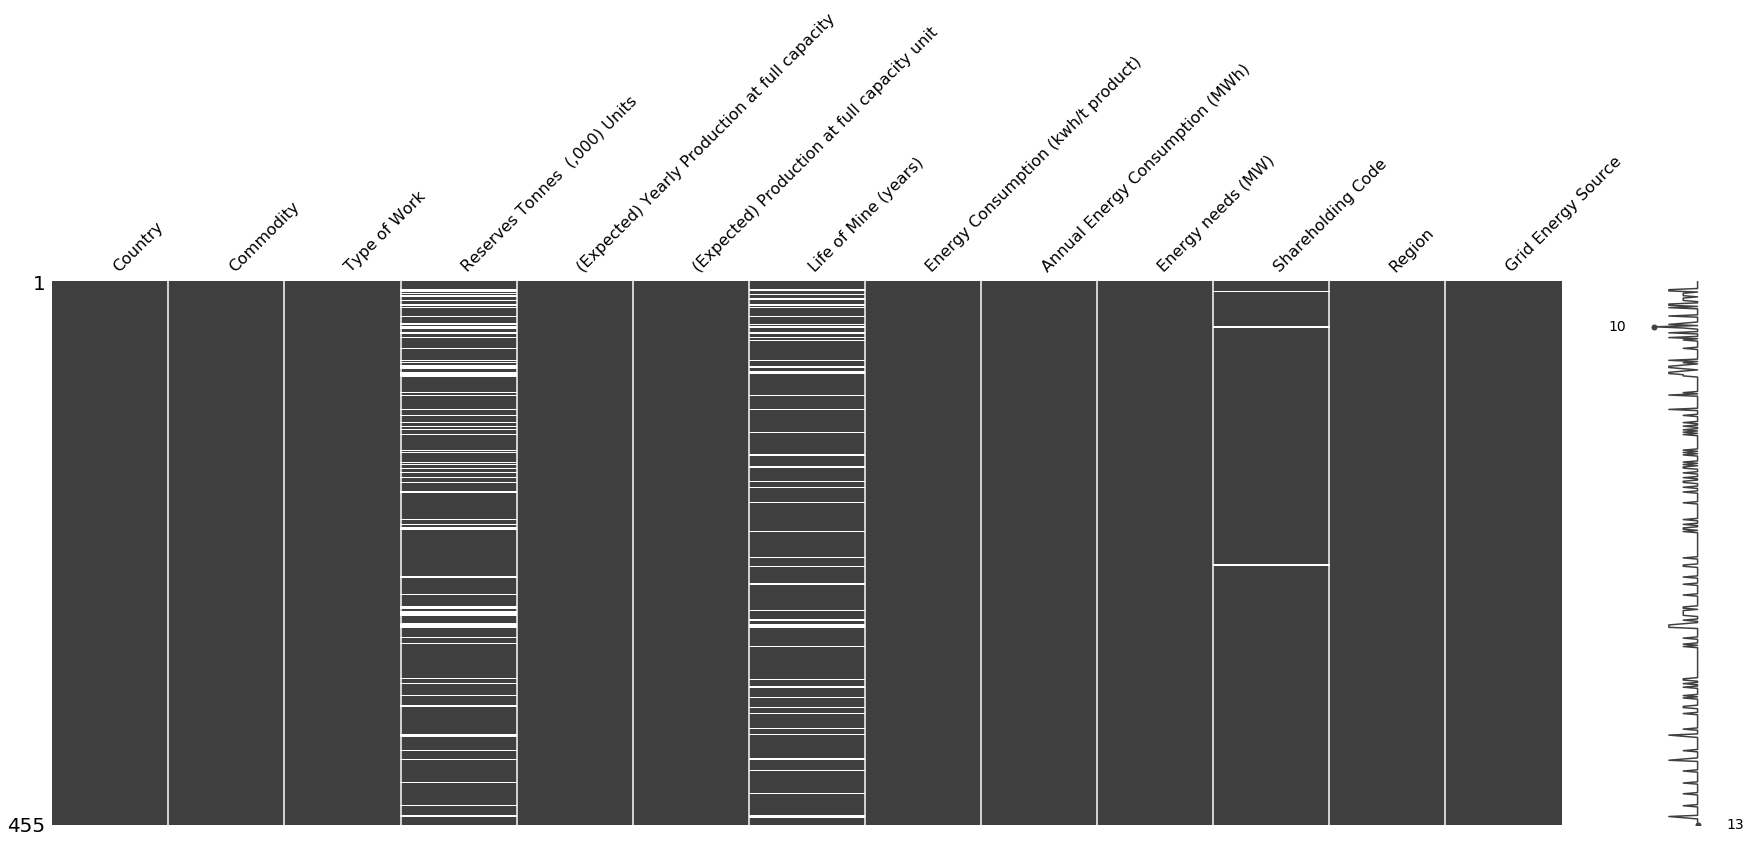

In [13]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

In [14]:
# I will use average values for reserves in tonnes
df['Reserves Tonnes  (,000) Units'].fillna(value=df['Reserves Tonnes  (,000) Units'].mean(), inplace=True)
# I will also use the average life of a mine
df['Life of Mine (years)'].fillna(value=df['Life of Mine (years)'].mean(), inplace=True)


In [15]:
# I will use the modal category to replace Shareholding Code
df['Shareholding Code'].value_counts()

Sole Ownership by a private company          232
Join-venture with only private interests     110
Joint- venture with State Equity             100
Sole ownership by the State-Owned Company      9
Not awarded yet                                1
Name: Shareholding Code, dtype: int64

In [16]:
df = df.fillna({"Shareholding Code" : "Sole Ownership by a private company"})

In [17]:
# How much data is missing now?
# The number of missing data points per column
missing_values = df.isnull().sum()
# Look at the # of missing points in all columns
missing_values

Country                                           0
Commodity                                         0
Type of Work                                      0
Reserves Tonnes  (,000) Units                     0
(Expected) Yearly Production at full capacity     0
(Expected) Production at full capacity unit       0
Life of Mine (years)                              0
Energy Consumption (kwh/t product)                0
Annual Energy Consumption (MWh)                   0
Energy needs (MW)                                 0
Shareholding Code                                 0
Region                                            0
Grid Energy Source                                0
dtype: int64

In [18]:
# Get all countries
countries = df['Country'].unique()
countries.sort()
countries

array(['Angola', 'Botswana', 'Burkina Faso', 'Cameroon',
       'Central African Republic', 'Congo, Dem. Rep. of',
       'Congo, Rep. of the', 'Eritrea', 'Gabon', 'Ghana', 'Guinea',
       'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger',
       'Senegal', 'Sierra Leone', 'South Africa', 'Tanzania', 'Zambia',
       'Zimbabwe'], dtype=object)

In [19]:
# We need to merge "Congo, Dem. Rep. of" and "Congo, Rep. of the"
# convert to lower case
df['Country'] = df['Country'].str.lower()

# remove trailing white spaces
df['Country'] = df['Country'].str.strip()

# get the top 4 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("Congo, Dem. Rep. of", countries, limit=4, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('Congo, Dem. Rep. of', 100),
 ('Congo, Rep. of the', 75),
 ('Central African Republic', 40),
 ('Niger', 38)]

In [22]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 70):
   
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=4, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [23]:
# use the function we just wrote to replace close matches
replace_matches_in_column(df=df, column='Country', string_to_match="congo, dem. rep. of")

All done!


In [24]:
# Get all countries
countries = df['Country'].unique()
countries.sort()
countries

array(['angola', 'botswana', 'burkina faso', 'cameroon',
       'central african republic', 'congo, dem. rep. of', 'eritrea',
       'gabon', 'ghana', 'guinea', 'ivory coast', 'kenya', 'lesotho',
       'liberia', 'madagascar', 'malawi', 'mali', 'mauritania',
       'mozambique', 'namibia', 'niger', 'senegal', 'sierra leone',
       'south africa', 'tanzania', 'zambia', 'zimbabwe'], dtype=object)

In [25]:
# Capitalize first letters again
df['Country'] = df['Country'].str.title()

South Africa                168
Congo, Dem. Rep. Of          41
Tanzania                     23
Botswana                     20
Zimbabwe                     18
Guinea                       16
Zambia                       16
Burkina Faso                 15
Namibia                      15
Ghana                        12
Mali                         11
Sierra Leone                 10
Angola                        9
Ivory Coast                   8
Senegal                       8
Mozambique                    8
Liberia                       8
Eritrea                       7
Madagascar                    7
Cameroon                      6
Niger                         6
Gabon                         6
Mauritania                    5
Lesotho                       4
Malawi                        3
Kenya                         3
Central African Republic      2
Name: Country, dtype: int64


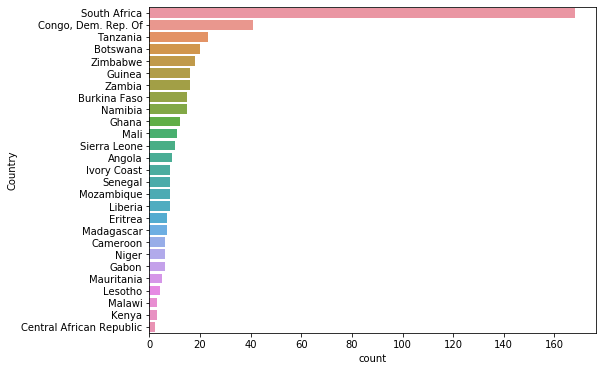

In [26]:
# I want to visualize how many mines there are in each country
fig = plt.figure(figsize=(8,6))
sns.countplot(y='Country', data=df, order = df['Country'].value_counts().index);
print(df.Country.value_counts())

Gold                        128
Copper                       44
Coal                         36
Platinum                     35
Iron Ore                     33
Diamond                      29
Uranium                      17
Manganese                    16
Cobalt                       14
Chromium                     13
PGM                          12
Nickel                        9
Ilmenite                      7
Bauxite                       7
Aluminum                      6
Zinc                          5
Nickel from N-C Sulphide      5
Rutile                        5
Zirconium                     5
Silver                        4
Palladium                     4
Phosphate                     3
Ruthenium                     3
Rare Earth                    3
Lead                          3
Silico-Manganese              2
Rhodium                       2
Niobium                       1
Potash                        1
Tantalum                      1
Vanadium                      1
Cement  

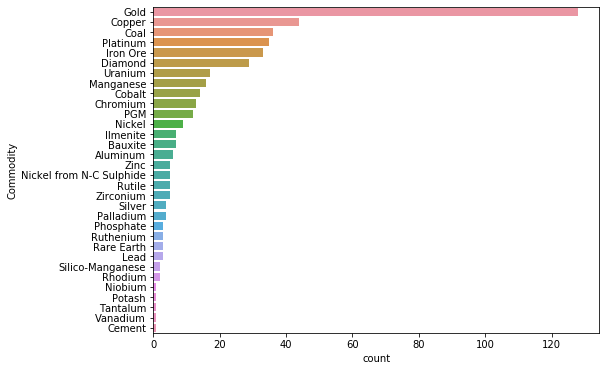

In [27]:
# I now want to visualize how many of the different types of mines there are in africa
fig = plt.figure(figsize=(8,6))
sns.countplot(y='Commodity', data=df, order = df['Commodity'].value_counts().index);
print(df.Commodity.value_counts())

Mainly Coal Fuelled Generation     206
Mainly Hydro Powered Generation    182
Mainly Oil Fuelled Generation       59
Mainly Gas Powered Generation        8
Name: Grid Energy Source, dtype: int64


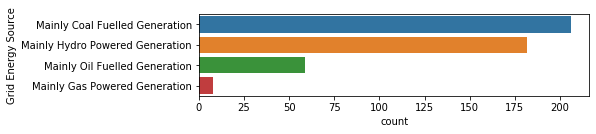

In [28]:
# I now want to visualize the main energy sources used form mines in africa
fig = plt.figure(figsize=(7,1.5))
sns.countplot(y='Grid Energy Source', data=df, order = df['Grid Energy Source'].value_counts().index);
print(df['Grid Energy Source'].value_counts())

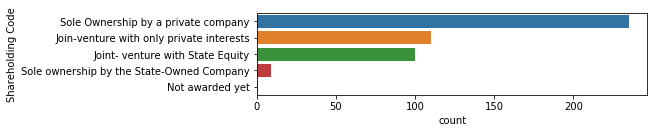

In [29]:
# I want to visualize the different types of ownership of mines in Africa
fig = plt.figure(figsize=(7,1.5))
sns.countplot(y='Shareholding Code', data=df, order = df['Shareholding Code'].value_counts().index);
print()

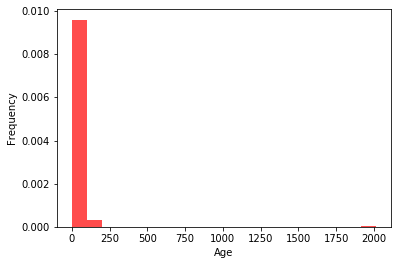

In [30]:
# Histogram of the life of mines
plt.hist(df['Life of Mine (years)'], 20, density =1,facecolor="red", alpha=0.7)
_ = plt.xlabel('Age')
_ = plt.ylabel('Frequency')
plt.show()

In [31]:
# There is an outlier in the life of mine column, so I want to replace it 

mean = df['Life of Mine (years)'].mean()

df['Life of Mine (years)'] = df['Life of Mine (years)'].replace(2014,mean)
df['Life of Mine (years)'] = pd.to_numeric(df['Life of Mine (years)'])

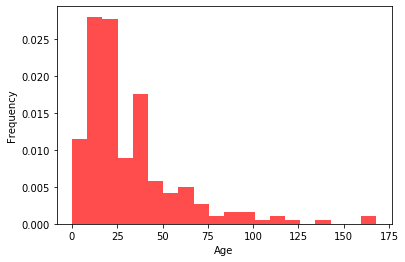

In [32]:
# Histogram of the life of mines
plt.hist(df['Life of Mine (years)'], 20, density =1,facecolor="red", alpha=0.7)
_ = plt.xlabel('Age')
_ = plt.ylabel('Frequency')
plt.show()
# The distribution is right-skewed

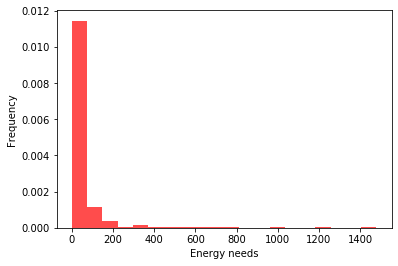

In [33]:
# Histogram of the life of mines
plt.hist(df['Energy needs (MW)'], 20, density =1,facecolor="red", alpha=0.7)
_ = plt.xlabel('Energy needs')
_ = plt.ylabel('Frequency')
plt.show()

In [36]:
#Get the mean
mean = df['Energy needs (MW)'].mean()
# If any values are 0, the normalize function won't work
df['Energy needs (MW)'] = df['Energy needs (MW)'].replace(0,mean)

Text(0.5, 1.0, 'Normalized data')

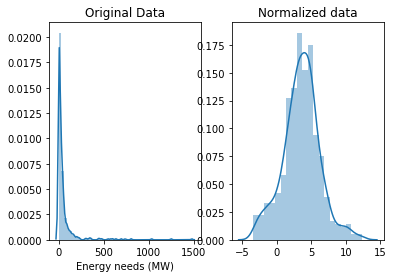

In [37]:
# normalize the life of mines (w/ Box-Cox)
energy = df['Energy needs (MW)']
normalized_energy = stats.boxcox(energy)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(energy, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_energy, ax=ax[1])
ax[1].set_title("Normalized data")

<function matplotlib.pyplot.show(*args, **kw)>

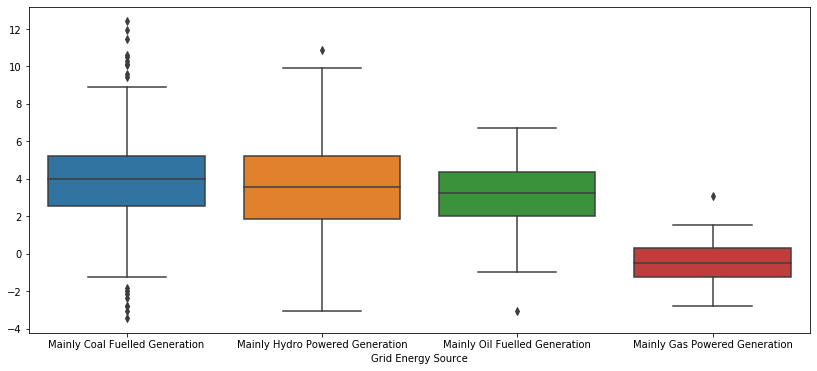

In [429]:
# How do different energy sources meet energy needs?
fig = plt.figure(figsize = (14,6)) # set the size of the figure
sns.boxplot(x='Grid Energy Source', y=normalized_energy, data=df)
plt.show

In [38]:
# How long does a mine last for on average?
df['Life of Mine (years)'].mean()

31.513676841676837

In [39]:
# If any values are 0, the normalize function won't work
df['Life of Mine (years)'] = df['Life of Mine (years)'].replace(0,0.1)

Text(0.5, 1.0, 'Normalized data')

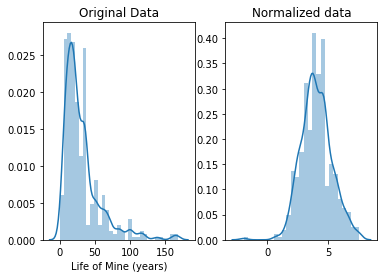

In [40]:
# normalize the life of mines (w/ Box-Cox)
age = df['Life of Mine (years)']
normalized_age = stats.boxcox(age)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(age, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_age, ax=ax[1])
ax[1].set_title("Normalized data")

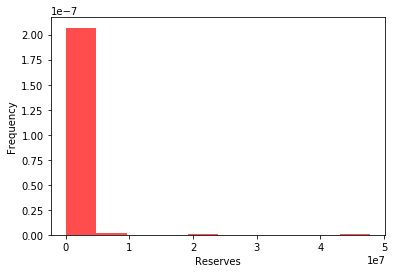

In [42]:
# Histogram of the reserves in mines
plt.hist(df['Reserves Tonnes  (,000) Units'], 10, density =1,facecolor="red", alpha=0.7)
_ = plt.xlabel('Reserves')
_ = plt.ylabel('Frequency')
plt.show()

In [43]:
# Both distributions need to be normalized.

Text(0.5, 1.0, 'Normalized data')

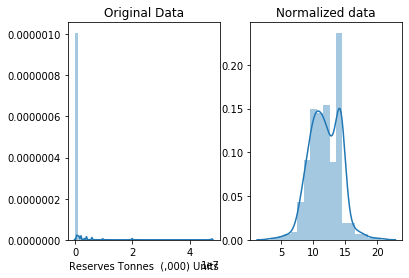

In [44]:
# normalize the reserves of mines (w/ Box-Cox)
res = df['Reserves Tonnes  (,000) Units']
normalized = stats.boxcox(res)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(res, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized, ax=ax[1])
ax[1].set_title("Normalized data")

<Figure size 720x1008 with 0 Axes>

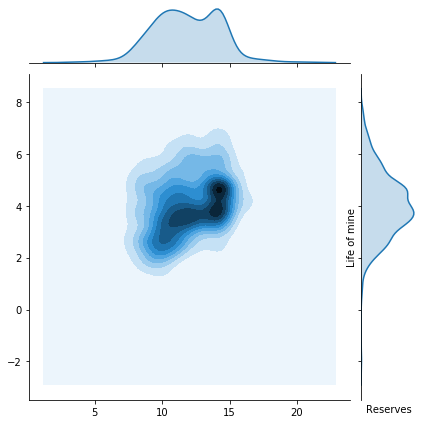

In [45]:
# What is the relationship between the amount of reserves and it's lifespan?
plt.figure(figsize=(10,14))
ax = sns.jointplot(x= normalized, y=normalized_age, data=df, kind='kde')
_ = plt.xlabel('Reserves')
_ = plt.ylabel('Life of mine')
plt.show()

<Figure size 720x1008 with 0 Axes>

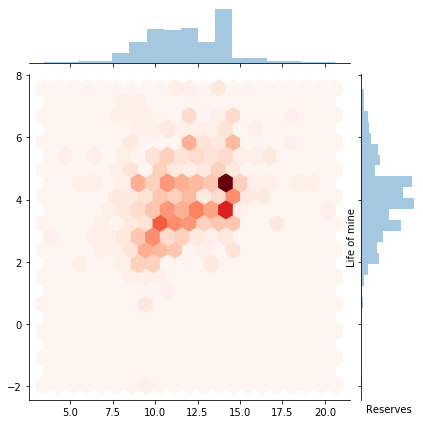

In [46]:
# What is the relationship between the amount of reserves and a mine's lifespan?
plt.figure(figsize=(10,14))
ax = sns.jointplot(x= normalized, y=normalized_age, data=df, kind='hex', gridsize=20, cmap='Reds') 
_ = plt.xlabel('Reserves')
_ = plt.ylabel('Life of mine')
plt.show()

<Figure size 720x1008 with 0 Axes>

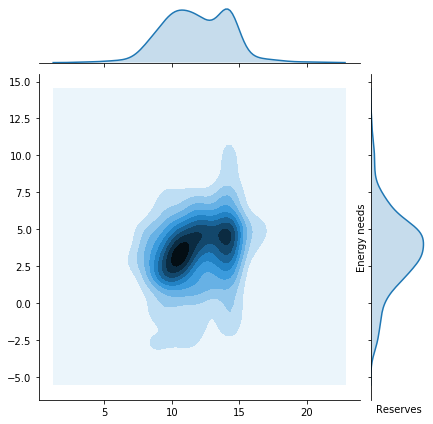

In [47]:
# What is the relationship between the amount of reserves and energy needs?
plt.figure(figsize=(10,14))
ax = sns.jointplot(x= normalized, y=normalized_energy, data=df, kind='kde')
_ = plt.xlabel('Reserves')
_ = plt.ylabel('Energy needs')
plt.show()

In [48]:
group_country = df.groupby(by=['Country'])

country = round(group_country.mean(),0)
country

,"Reserves Tonnes (,000) Units",(Expected) Yearly Production at full capacity,Life of Mine (years),Energy Consumption (kwh/t product),Annual Energy Consumption (MWh),Energy needs (MW)
Country,,,,,,
Angola,274352.0,2725667.0,21.0,20000049.0,107776.0,11.0
Botswana,126839.0,2375366.0,30.0,14172374.0,90740.0,9.0
Burkina Faso,29095.0,142807.0,11.0,26000040.0,109393.0,11.0
Cameroon,337800.0,7301550.0,30.0,7290.0,1779595.0,185.0
Central African Republic,4600.0,2290000.0,12.0,12589000.0,241786.0,25.0
"Congo, Dem. Rep. Of",141662.0,1920552.0,24.0,3907103.0,346193.0,35.0
Eritrea,27260.0,146957.0,14.0,13574606.0,134877.0,14.0
Gabon,418233.0,4120000.0,56.0,850.0,129253.0,13.0
Ghana,252278.0,386333.0,23.0,27501293.0,295145.0,31.0


In [49]:
# create a new dataframe for the number of each type of mine per country
df2 = df.groupby(['Country','Commodity']).size().unstack(fill_value=0)

In [50]:
df2['num'] = df['Country'].value_counts()
df2 = df2.sort_values(by=['num'])
df2

Commodity,Aluminum,Bauxite,Cement,Chromium,Coal,Cobalt,Copper,Diamond,Gold,Ilmenite,...,Ruthenium,Rutile,Silico-Manganese,Silver,Tantalum,Uranium,Vanadium,Zinc,Zirconium,num
Country,,,,,,,,,,,,,,,,,,,,,
Central African Republic,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2
Malawi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,3
Kenya,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,3
Lesotho,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,4
Mauritania,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,5
Niger,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,4,0,0,0,6
Cameroon,2,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
Gabon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
Eritrea,0,0,0,0,0,0,2,0,3,0,...,0,0,0,1,0,0,0,1,0,7


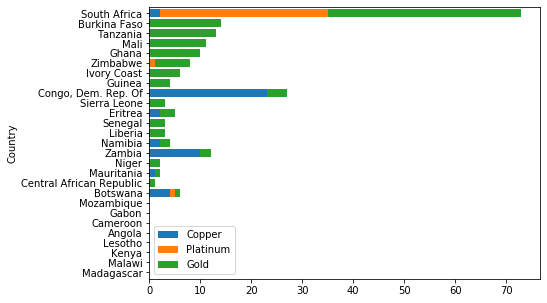

In [51]:
# Plot the number of mines of each type per country
# Assemble a DataFrame of only the relevant features to plot 
features = pd.DataFrame({'Copper': df2['Copper'], 'Platinum': df2['Platinum'], 'Gold' : df2['Gold']})
features = features.sort_values(by = 'Gold')
features.plot(kind='barh', stacked=True, sort_columns=True, width=0.8, figsize=(7,5))

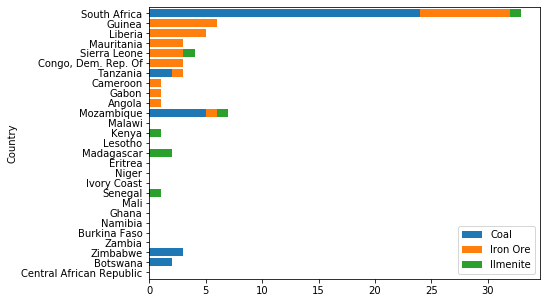

In [52]:
# Plot the number of mines of each type per country
# Assemble a DataFrame of only the relevant features to plot  
features = pd.DataFrame({'Coal': df2['Coal'], 'Iron Ore': df2['Iron Ore'], 'Ilmenite' : df2['Ilmenite']})
features = features.sort_values(by = 'Iron Ore')
features.plot(kind='barh', stacked=True, sort_columns=True, width=0.8, figsize=(7,5))


In [53]:
# create a new dataframe for the number of each type of mining style per country
df3 = df.groupby(['Commodity','Type of Work']).size().unstack(fill_value=0)
df3

Type of Work,Open-Pit,Open-Pit/Underground,Open-pit,Placer,Plant,Surface,Tailings,Underground
Commodity,,,,,,,,
Aluminum,0,0,0,0,6,0,0,0
Bauxite,4,0,0,0,0,3,0,0
Cement,0,0,0,0,1,0,0,0
Chromium,2,3,0,0,1,0,0,7
Coal,15,7,1,0,0,2,0,11
Cobalt,6,3,0,0,1,2,1,1
Copper,17,8,0,0,0,6,3,10
Diamond,14,3,0,4,0,6,1,1
Gold,31,26,0,0,0,33,3,35


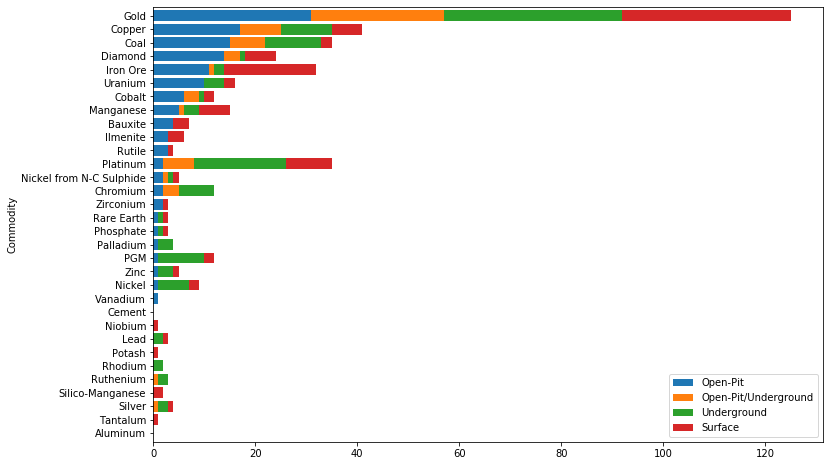

In [54]:
features = pd.DataFrame({'Open-Pit': df3['Open-Pit'], 'Open-Pit/Underground': df3['Open-Pit/Underground'], 
                         'Underground' : df3['Underground'], 'Surface' : df3['Surface']})
features = features.sort_values(by = 'Open-Pit')
features.plot(kind='barh', stacked=True, width=0.8, figsize=(12,8))

In [55]:
# create a new dataframe for the number of each type of mine per country
df4 = df.groupby(['Commodity','Shareholding Code']).size().unstack(fill_value=0)
df4

Shareholding Code,Join-venture with only private interests,Joint- venture with State Equity,Not awarded yet,Sole Ownership by a private company,Sole ownership by the State-Owned Company
Commodity,,,,,
Aluminum,0,2,0,4,0
Bauxite,1,2,0,4,0
Cement,0,1,0,0,0
Chromium,7,1,0,4,1
Coal,11,5,0,20,0
Cobalt,2,8,0,3,1
Copper,5,19,0,16,4
Diamond,7,9,0,12,1
Gold,9,32,0,86,1


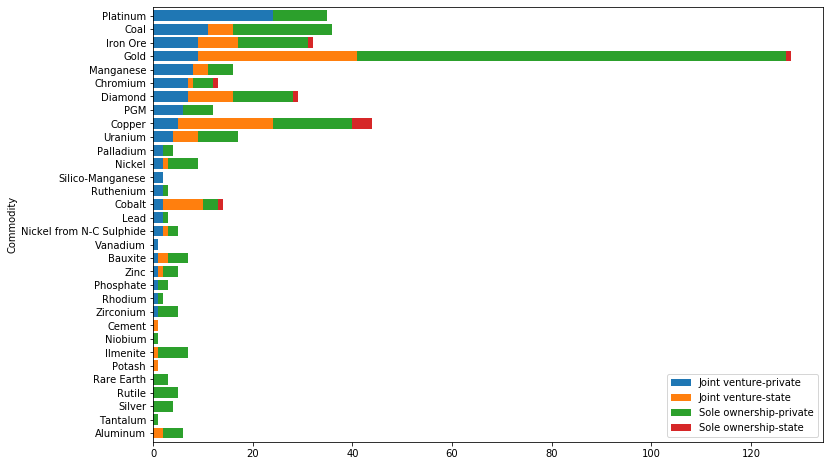

In [56]:
features = pd.DataFrame({'Joint venture-private': df4['Join-venture with only private interests'], 
                         'Joint venture-state': df4['Joint- venture with State Equity'], 
                         'Sole ownership-private' : df4['Sole Ownership by a private company'], 
                         'Sole ownership-state' : df4['Sole ownership by the State-Owned Company']})
features = features.sort_values(by = 'Joint venture-private')
features.plot(kind='barh', stacked=True, width=0.8, figsize=(12,8))

In [57]:
group_commodity = df.groupby(by=['Commodity'])

commodity = round(group_commodity.mean(),0)
commodity

,"Reserves Tonnes (,000) Units",(Expected) Yearly Production at full capacity,Life of Mine (years),Energy Consumption (kwh/t product),Annual Energy Consumption (MWh),Energy needs (MW)
Commodity,,,,,,
Aluminum,372784.0,277333.0,36.0,15500.0,4298667.0,448.0
Bauxite,357362.0,6424000.0,45.0,268.0,1125696.0,117.0
Cement,372784.0,2000000.0,36.0,125.0,250000.0,26.0
Chromium,121215.0,505692.0,35.0,3955.0,2163642.0,234.0
Coal,2141395.0,7296671.0,35.0,82.0,337640.0,35.0
Cobalt,40731.0,7671.0,26.0,6643.0,50689.0,5.0
Copper,70056.0,104876.0,27.0,6186.0,643376.0,67.0
Diamond,95957.0,2176291.0,36.0,31034483.0,19113.0,2.0
Gold,68184.0,190973.0,25.0,34531250.0,191196.0,20.0


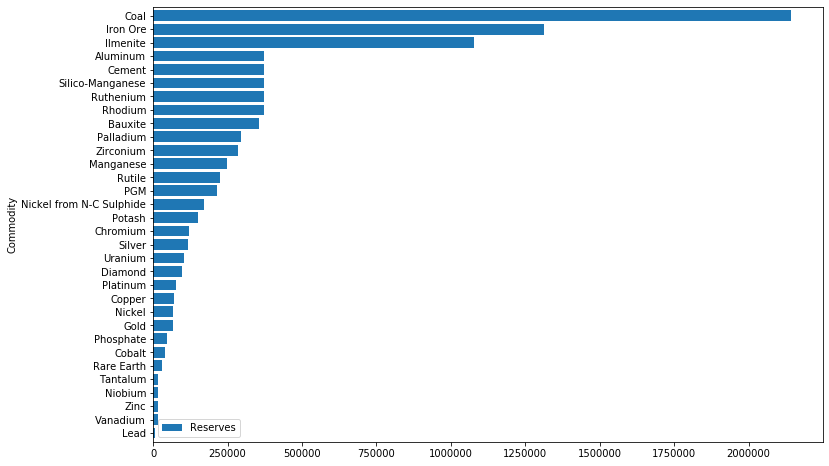

In [58]:
## we will assemble a DataFrame of only the relevant features to plot  
features = pd.DataFrame({'Reserves': commodity["Reserves Tonnes  (,000) Units"]})

## Let us plot the prices for all makes
features = features.iloc[:].sort_values('Reserves')
features.plot.barh(stacked=True, width=0.8, figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F29601888>],
      dtype=object)

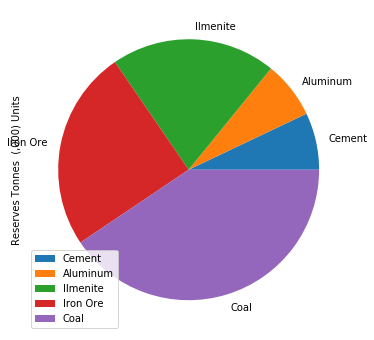

In [59]:
# Plot a pie chart of the 5 most abundant commodities in Africa
commodity_sorted = commodity.sort_values(by=['Reserves Tonnes  (,000) Units'])
top5 = pd.DataFrame(commodity_sorted.iloc[27:,0])
top5.plot.pie(subplots=True, figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F2969BC48>],
      dtype=object)

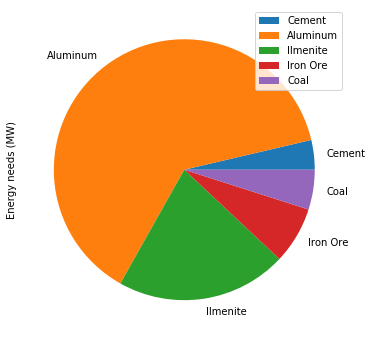

In [60]:
# Plot a pie chart of the energy requirements to mine the 5 most abundant commodities in Africa
commodity_sorted = commodity.sort_values(by=['Reserves Tonnes  (,000) Units'])
top5 = pd.DataFrame(commodity_sorted.iloc[27:,5])
top5.plot.pie(subplots=True, figsize=(6, 6))

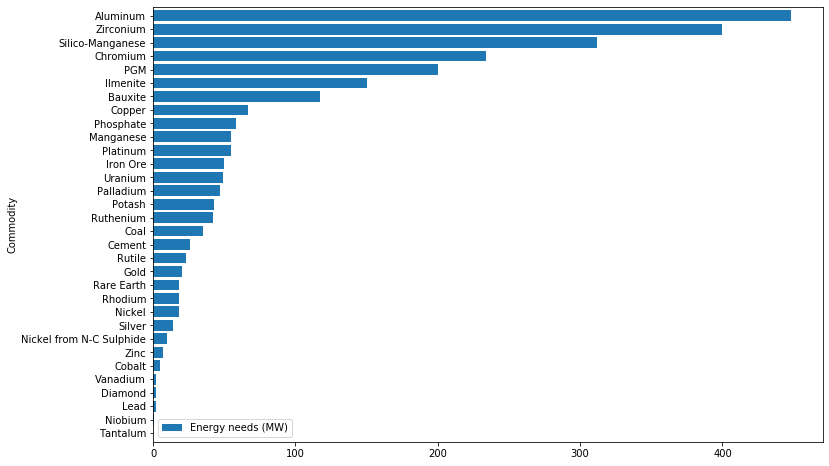

In [61]:
## we will assemble a DataFrame of only the relevant features to plot  
features = pd.DataFrame({'Energy needs (MW)': commodity["Energy needs (MW)"]})

## Let us plot the prices for all commodities
features = features.iloc[:].sort_values('Energy needs (MW)')
features.plot.barh(stacked=True, width=0.8, figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F299C2648>],
      dtype=object)

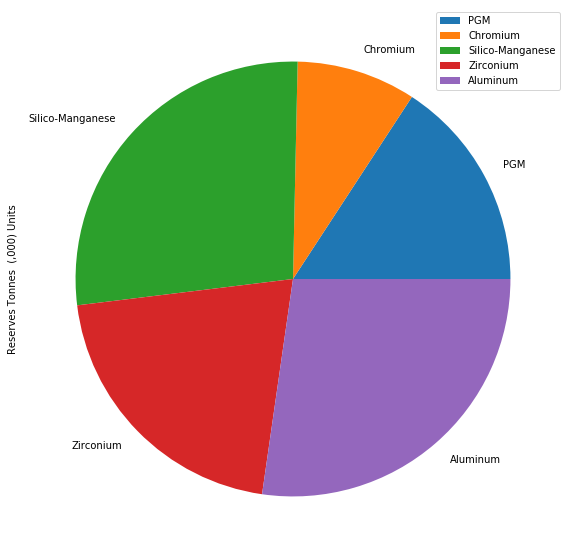

In [62]:
# Plot a pie chart of the 5 most energy intensive commodities in Africa
commodity_sorted = commodity.sort_values(by=['Energy needs (MW)'])
top5 = pd.DataFrame(commodity_sorted.iloc[27:,0])
top5.plot.pie(subplots=True, figsize=(10, 10))

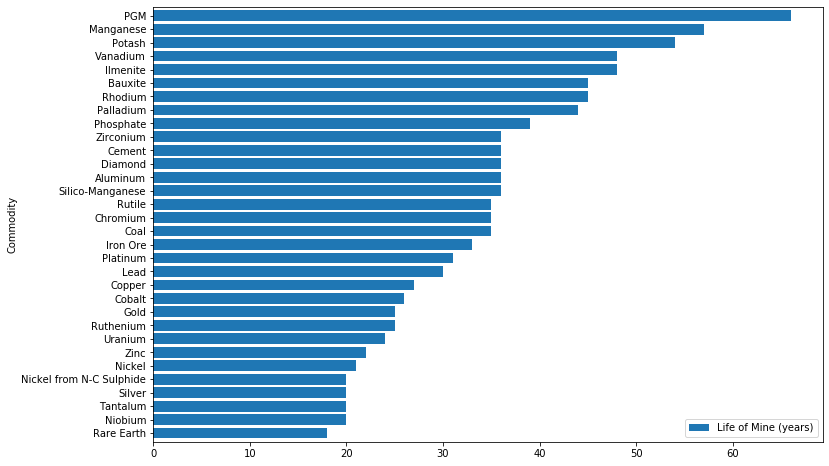

In [63]:
## we will assemble a DataFrame of only the relevant features to plot  
features = pd.DataFrame({'Life of Mine (years)': commodity["Life of Mine (years)"]})

## Let us plot the prices for all commodities
features = features.iloc[:].sort_values('Life of Mine (years)')
features.plot.barh(stacked=True, width=0.8, figsize=(12,8))

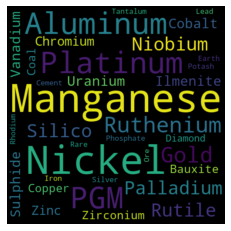

In [64]:
#Create a word cloud of the different commodities
# Extract the unique names
comms = df['Commodity'].unique()
# add them to a list
c_list = []
for i in comms:
    c_list.append(i)

#Create visualization
wordcloud = WordCloud(width = 500, height = 500, margin = 10).generate(" ".join(c_list))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

In [65]:
df['Grid Energy Source'].unique()

array(['Mainly Coal Fuelled Generation',
       'Mainly Hydro Powered Generation', 'Mainly Oil Fuelled Generation',
       'Mainly Gas Powered Generation'], dtype=object)

In [66]:
# Edit the category names
df['Grid Energy Source'] = df['Grid Energy Source'].replace('Mainly Coal Fuelled Generation','Coal')
df['Grid Energy Source'] = df['Grid Energy Source'].replace('Mainly Hydro Powered Generation','Hydro')
df['Grid Energy Source'] = df['Grid Energy Source'].replace('Mainly Oil Fuelled Generation','Oil')
df['Grid Energy Source'] = df['Grid Energy Source'].replace('Mainly Gas Powered Generation','Gas')

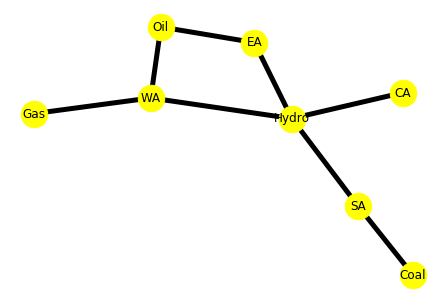

In [67]:
# Create a network graph to show how energy sources are associated with certain regions
G = nx.from_pandas_edgelist(df, 'Region', 'Grid Energy Source')
#Customize the nodes
nx.draw(G, with_labels=True, node_color='yellow', node_size=700, width=5)
plt.show()